In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [22]:
df=pd.read_csv('global_house_purchase_dataset.csv')
df=df.drop('property_id',axis=1)
df

,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,2,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Germany,Berlin,Villa,Fully-Furnished,685,203328,1968,1,3,2,...,78330,104050,15,17670,99278,0.01,8,4,5,1
199996,China,Shenzhen,Townhouse,Unfurnished,3818,1454627,1977,5,7,5,...,25400,1175297,20,2865,279330,0.34,7,10,9,1
199997,Japan,Kyoto,Villa,Semi-Furnished,3603,1619147,1990,2,4,4,...,28220,743049,30,5595,876098,0.17,5,3,9,0
199998,South Africa,Johannesburg,Apartment,Unfurnished,1706,306165,2010,0,4,1,...,12240,150774,15,16300,155391,0.11,6,10,6,0


Text(0.5, 1.0, 'correlation between numric')

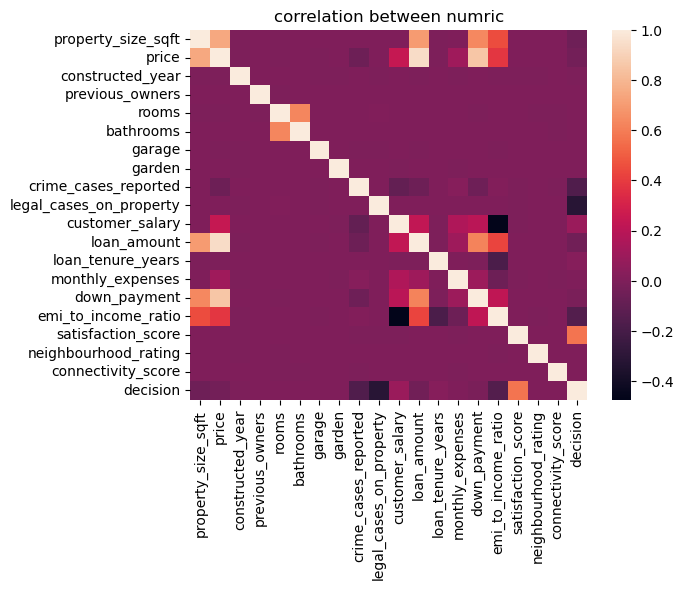

In [32]:
sns.heatmap(df.corr(numeric_only=True),annot=False)
plt.title('correlation between numric')

In [27]:
df_numric=df.copy()

for col in df_numric.columns:
    if(df_numric[col].dtype=='object'):
        df_numric[col]=df_numric[col].astype('category')
        df_numric[col]=df_numric[col].cat.codes

Text(0.5, 1.0, 'correlation overall')

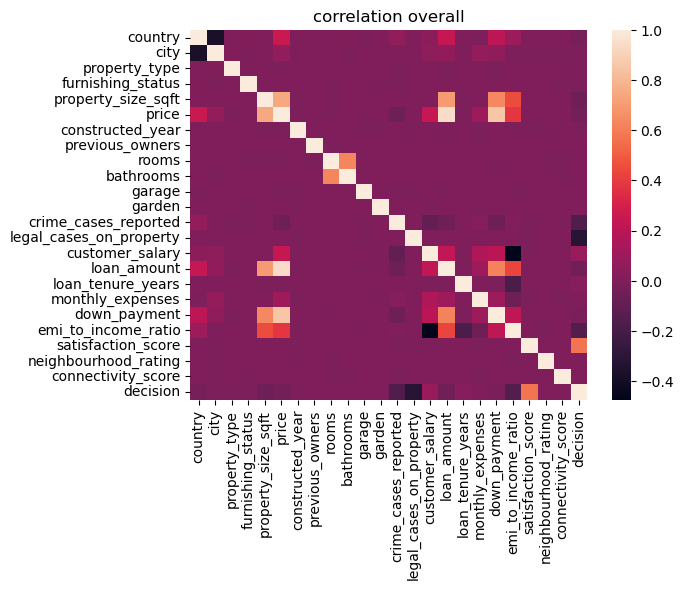

In [33]:
sns.heatmap(df_numric.corr(),annot=False)
plt.title('correlation overall')

In [6]:
x=df.iloc[:,:-1]
y=df['decision']

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [8]:
scal=StandardScaler()
x_train=scal.fit_transform(x_train)
x_test=scal.transform(x_test)

In [35]:
from imblearn.over_sampling import SMOTE
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'
sm=SMOTE()
x_train, y_train=sm.fit_resample(x_train,y_train)

In [95]:
model= LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [96]:
ypred=model.predict(x_test)

print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     30852
           1       0.82      0.94      0.88      9148

    accuracy                           0.94     40000
   macro avg       0.90      0.94      0.92     40000
weighted avg       0.94      0.94      0.94     40000



In [100]:
from tensorflow.keras.layers import Dense , Dropout ,Input
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
tf_model=Sequential([
    Input(shape=(23,)),
    Dense(4,activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])
tf_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy'])

early_stop=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history=tf_model.fit(x_train,y_train,
                     batch_size=16
                     ,epochs=50
                     ,verbose=True
                     ,validation_data=(x_test,y_test),
                     callbacks=[early_stop]
)


Epoch 1/50
15385/15385 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 0.9165 - loss: 0.2247 - val_accuracy: 0.9659 - val_loss: 0.0825
Epoch 2/50
15385/15385 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9456 - loss: 0.1672 - val_accuracy: 0.9668 - val_loss: 0.0822
Epoch 3/50
15385/15385 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9452 - loss: 0.1678 - val_accuracy: 0.9665 - val_loss: 0.0825
Epoch 4/50
15385/15385 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9458 - loss: 0.1650 - val_accuracy: 0.9650 - val_loss: 0.0845
Epoch 5/50
15385/15385 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9465 - loss: 0.1645 - val_accuracy: 0.9680 - val_loss: 0.0807
Epoch 6/50
15385/15385 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9458 - loss: 0.1658 - val_accuracy: 0.9675 - val_loss: 0.0812
Epoch 7/50
15385/15385 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9464 - loss: 0.1636 - val_accuracy: 0.9677 - val_loss: 0.0789
Epoch 8/50
15385/15385 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 

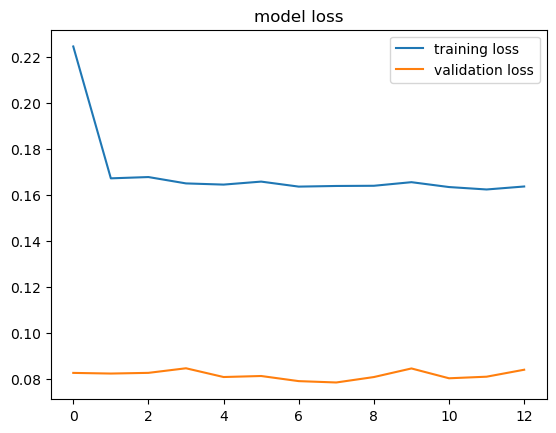

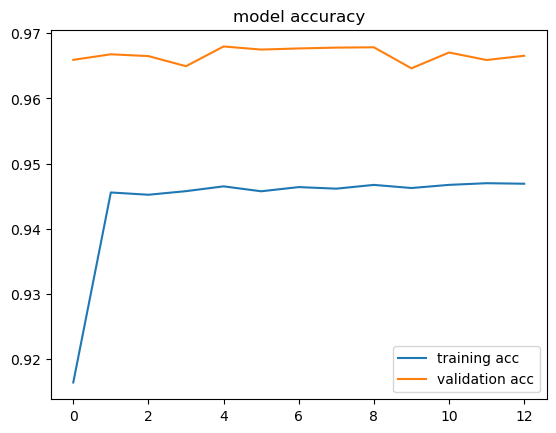

In [103]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label= 'validation loss')
plt.title('model loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], label='training acc')
plt.plot(history.history['val_accuracy'], label='validation acc')
plt.title('model accuracy')
plt.legend()
plt.show()

In [104]:
test_loss, test_acc=tf_model.evaluate(x_test,y_test, verbose=True)
test_loss

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.9678 - loss: 0.0783  


0.07833535224199295

In [105]:
tfypred=tf_model.predict(x_test)
tfypred=(tfypred > 0.5).astype(int)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step


In [106]:
print(metrics.classification_report(y_test,tfypred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98     30852
           1       0.90      0.97      0.93      9148

    accuracy                           0.97     40000
   macro avg       0.94      0.97      0.96     40000
weighted avg       0.97      0.97      0.97     40000

